# 클러스터링
- 특성 공간에서 성격이 비슷한 샘플들을 같은 그룹으로 묶는 작업
- 군집화라고 한다
- 적절한 클러스터 갯수를 찾는 것이 중요하다
- 거리기반 클러스터링이 기본적으로 사용되지만, 특성 공간상의 방향성을 기준으로 유사도를 정의하기도 한다
- 일정한 밀도를 유지하는 샘플들은 같은 클러스터로 취급하는 밀도기반 클러스터링도 있다
- 금융활동이 유사한 사람들을 클러스터링 하는 예제를 소개한다

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (5,5)
matplotlib.rcParams.update({'font.size': 13})

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# 데이터 읽기

In [3]:
## 데이터 다운로드

data = pd.read_csv('https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv')
print(data.shape)
print(data.Gender.value_counts())
data.head()

(200, 5)
Female    112
Male       88
Name: Gender, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 전처리
- 성별을 One Hot Encoding

In [4]:
## 데이터 전처리

# 컬럼 삭제
df = data.copy()
df = df.drop("CustomerID", axis=1)

# 카테고리 인코딩 (성별)
df.Gender = df.Gender.map({"Male":0, "Female":1})

# 스케일링
scaler = StandardScaler()
continuous = df.columns.difference(['Gender'])
df[continuous] = scaler.fit_transform(df[continuous])
df[:5]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


# kMeans 클러스터링

In [19]:
## 클러스터링 수행
K = 5

kmeans = KMeans(K).fit(df)

# 개인별 클러스터 번호 보기
df["Cluster"] = kmeans.labels_
print(df["Cluster"].value_counts())
df[:5]

4    65
3    39
2    38
0    34
1    24
Name: Cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,-1.424569,-1.738999,-0.434801,1
1,0,-1.281035,-1.738999,1.195704,1
2,1,-1.352802,-1.700830,-1.715913,2
3,1,-1.137502,-1.700830,1.040418,1
4,1,-0.563369,-1.662660,-0.395980,1


In [20]:
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

# 최적의 클러스터 수 찾기

- 아래와 같이 세가지 방법을 주로 사용한다 (-> 3가지 다 해봐야함)
 - 덴드로그램
 - 실루엣 지수 보기
 - mass(inertia)의 변화 보기

## 덴드로그램

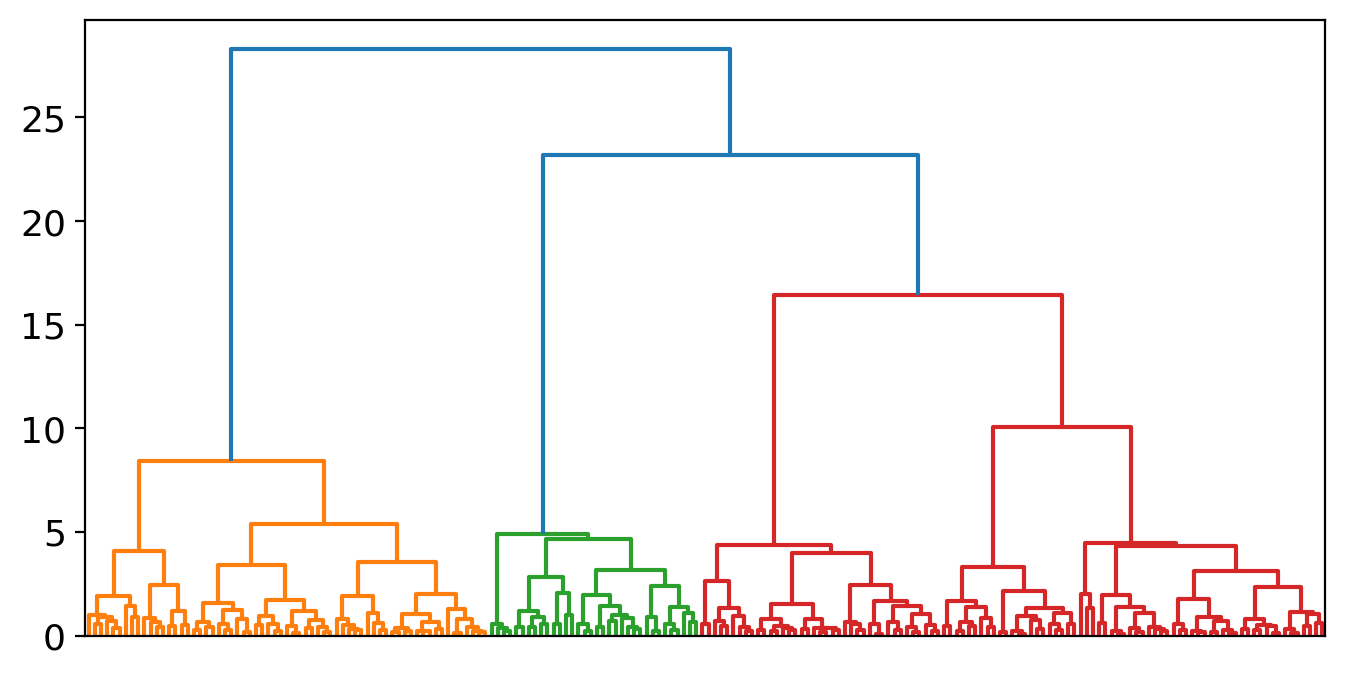

In [21]:
## 덴드로그램

plt.figure(figsize=(8, 4))
link_dist = linkage(df, metric='euclidean', method='ward')
dendrogram(link_dist, labels=df.index.tolist())
plt.xticks([])
plt.show()

In [22]:
# 200개 Sample 상호간의 거리
link_dist

array([[6.50000000e+01, 6.80000000e+01, 7.17666897e-02, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 7.17666897e-02, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 9.00803899e-02, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 1.05730374e-01, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 1.20910138e-01, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 1.30409100e-01, 2.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 1.38349565e-01, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 1.43533379e-01, 2.00000000e+00],
       [1.00000000e+02, 1.05000000e+02, 1.48690768e-01, 2.00000000e+00],
       [1.47000000e+02, 1.59000000e+02, 1.53511726e-01, 2.00000000e+00],
       [8.40000000e+01, 8.70000000e+01, 1.55855895e-01, 2.00000000e+00],
       [4.60000000e+01, 5.00000000e+01, 1.56659188e-01, 2.00000000e+00],
       [1.10000000e+01, 1.90000000e+01, 1.57536024e-01, 2.00000000e+00],
       [9.60000000e+01, 1.01000000e+02, 1.67142352e

## 실루엣 지수

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

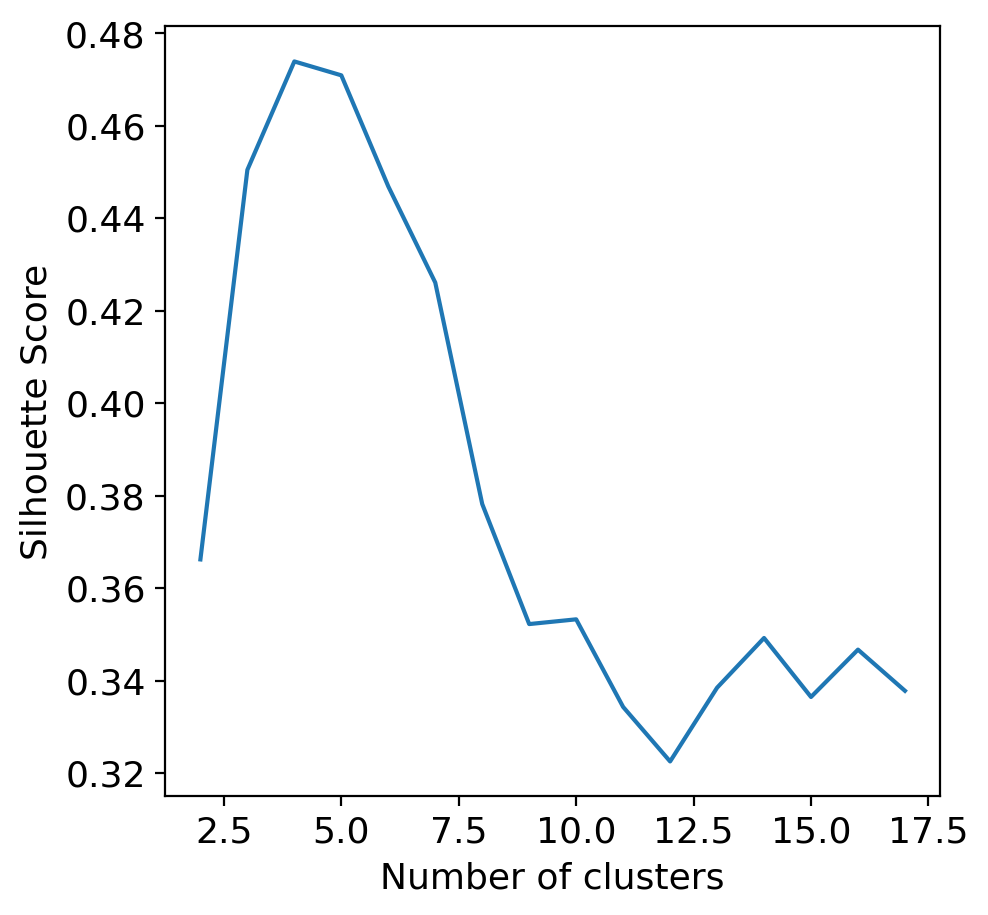

In [24]:
## 실루엣 지수

results = []
N = 18
for k in range(2,N):
  cluster_labels = KMeans(k).fit_predict(df)
  score = silhouette_score(df, cluster_labels)
  results.append(score)

plt.plot(range(2,N), results)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show();

## knee 포인트

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

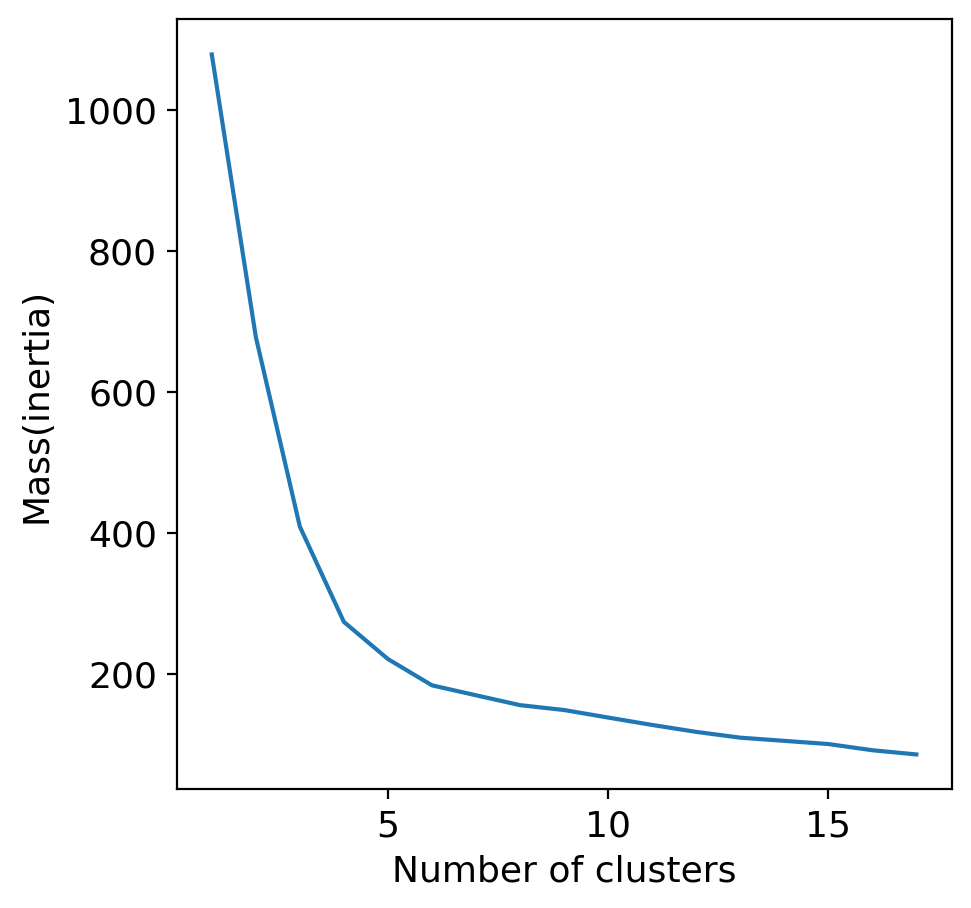

In [26]:
## elbow 포인트 (knee 포인트라고도 한다) -> 서서히 바뀌다가 확 바뀌는 지점

mass = []
for i in range(1, N):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    mass.append(kmeans.inertia_)
plt.plot(range(1, N), mass)
plt.xlabel('Number of clusters')
plt.ylabel('Mass(inertia)')
plt.show()

# 최적의 클러스터링 수행

In [41]:
## 최적의 클러스터링 수행 (k=4)

kmeans = KMeans(4).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 임의의 특성 공간에서 산포도 그리기

- 클러스터가 임의의 특성 공간에서는 시각적으로 잘 구분되지 않는다
- Age, Annual Income (k$), Spending Score (1-100) 특성 공간에서 그리기

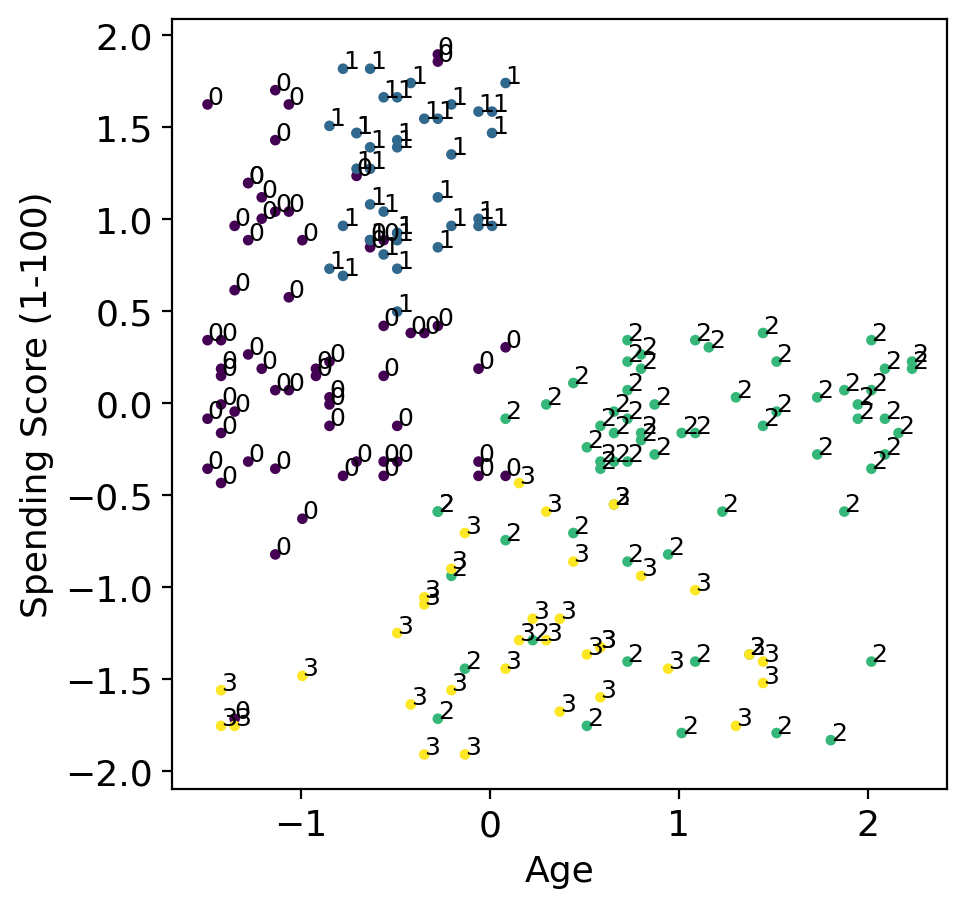

In [42]:
## Age - Spending Score (1-100) 특성 공간 산포도

# 산포도 그리기
plt.scatter(df['Age'], df['Spending Score (1-100)'],
            c=kmeans.labels_, s=8)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(df['Age'][n], df['Spending Score (1-100)'][n],
             kmeans.labels_[n],
            fontsize=9)

- Spending Score (1-100), Annual Income (k$) 특성 공간에서 그리기

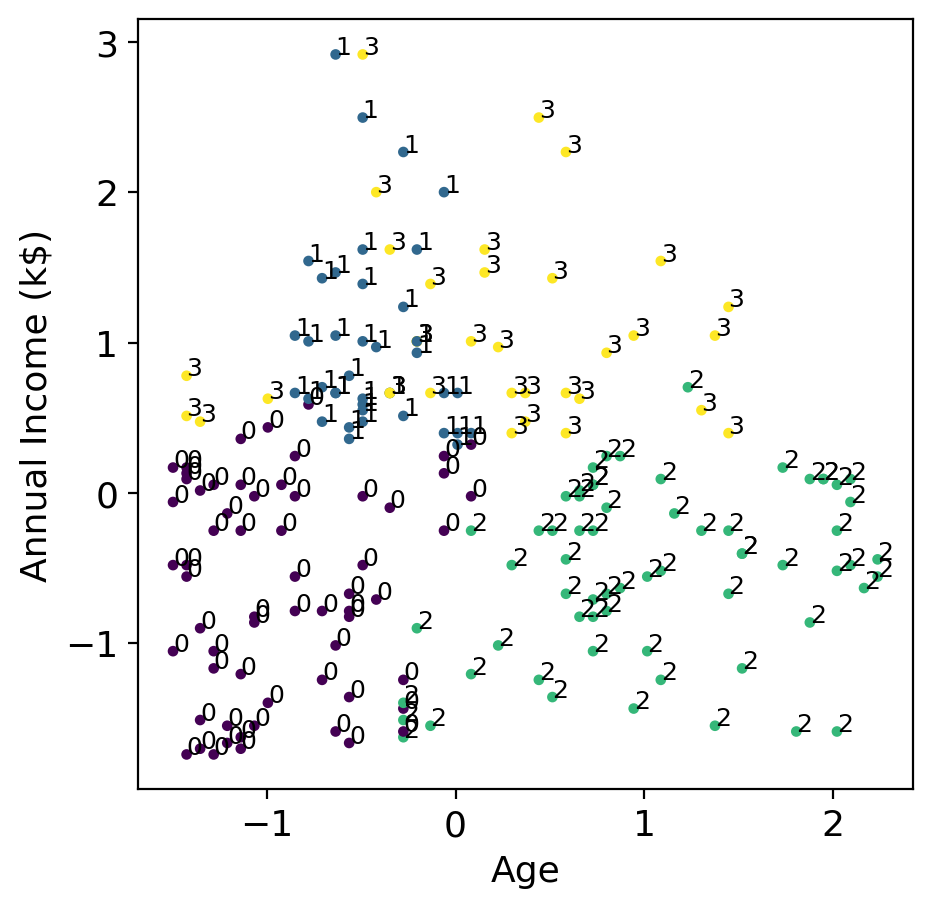

In [43]:
## Age - Annual Income (k$) 특성 공간 산포도

# 산포도 그리기
plt.scatter(df['Age'], df['Annual Income (k$)'],
            c=kmeans.labels_, s=8)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(df['Age'][n], df['Annual Income (k$)'][n],
             kmeans.labels_[n],fontsize=9)


## PCA(2) 공간상에서 산포도 그리기

- PCA 공간상에서는 클러스터가 잘 구분된 것을 알 수 있다

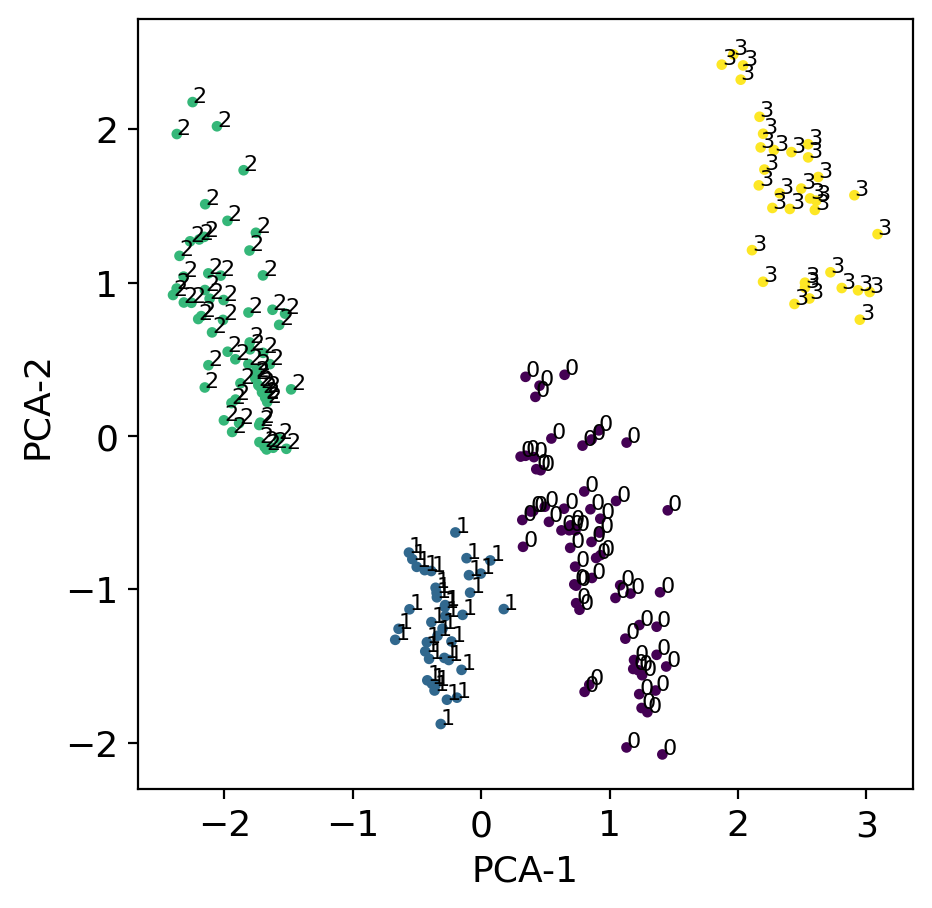

In [44]:
## PCA(2) 공간상에서 산포도 그리기

pca = PCA(2)
X_pca2 = pca.fit_transform(df)

# 산포도 그리기
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=kmeans.labels_, s=8)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n],
         kmeans.labels_[n],fontsize=8)

# (실습) 클러스터 수가  6 일때 클러스터 산포도를 그려보시오

- 앞에서 소개한 바와 같이 Age ~ Spending Score, Age ~ Annual Income 공간에서 산포도 그리기
- PCA(2) 공간에서 산포도 그리기

In [53]:
kmeans = KMeans(6).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


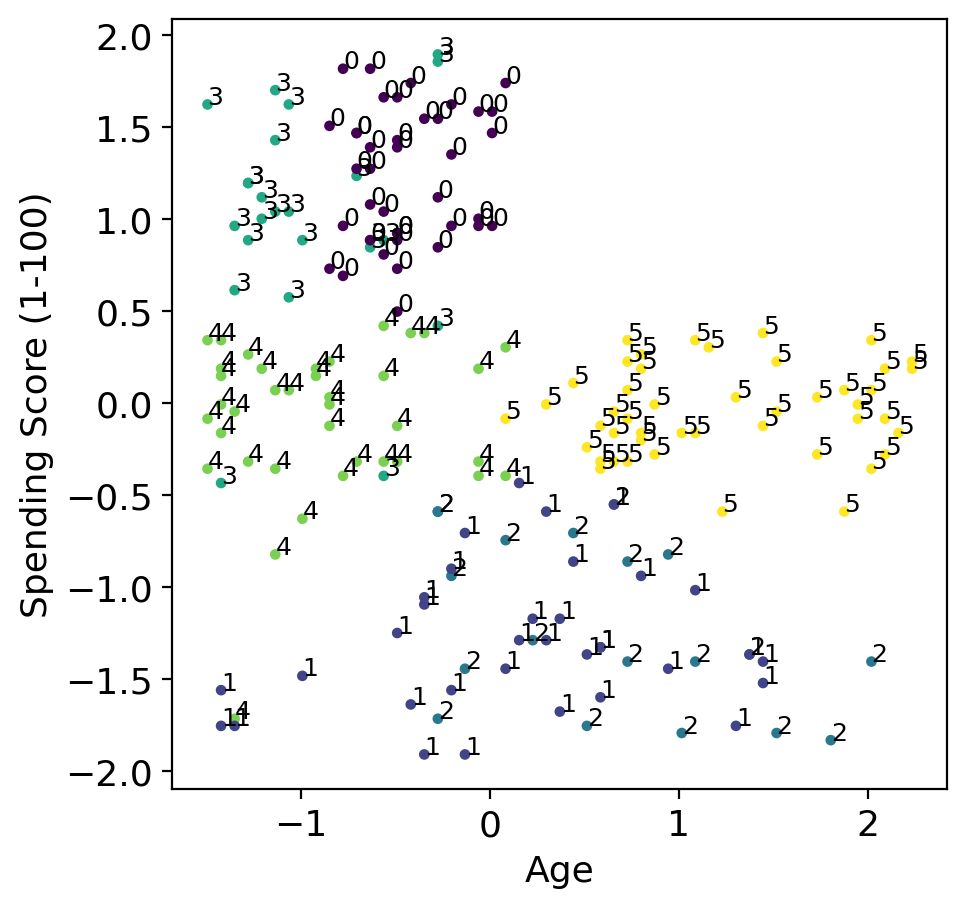

In [54]:
## Age - Spending Score (1-100) 특성 공간 산포도

# 산포도 그리기
plt.scatter(df['Age'], df['Spending Score (1-100)'],
            c=kmeans.labels_, s=8)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(df['Age'][n], df['Spending Score (1-100)'][n],
             kmeans.labels_[n],
            fontsize=9)

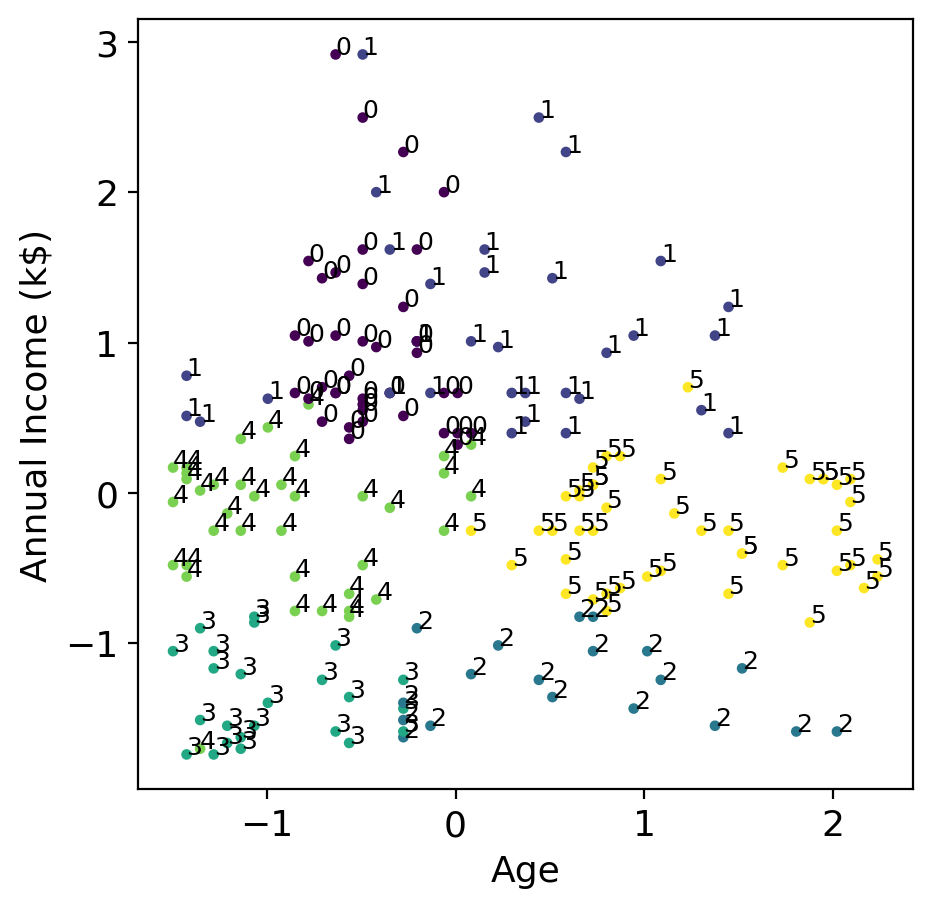

In [55]:
## Age - Annual Income (k$) 특성 공간 산포도

# 산포도 그리기
plt.scatter(df['Age'], df['Annual Income (k$)'],
            c=kmeans.labels_, s=8)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(df['Age'][n], df['Annual Income (k$)'][n],
             kmeans.labels_[n],fontsize=9)

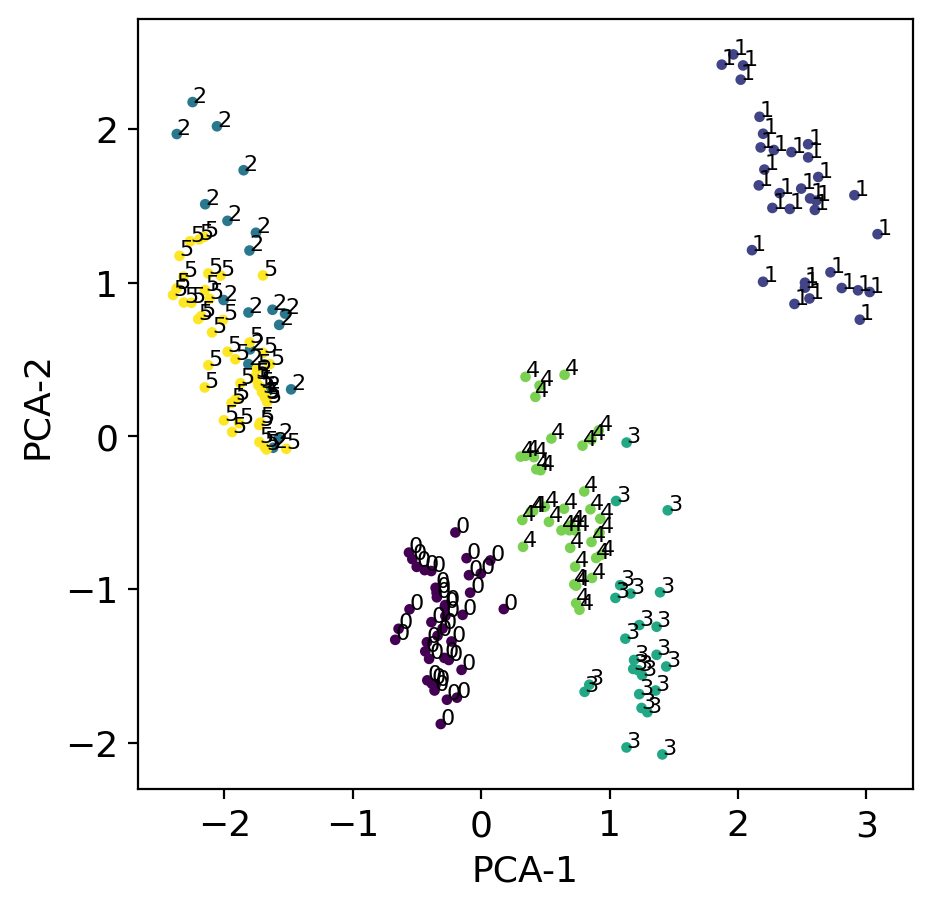

In [56]:
## PCA(2) 공간상에서 산포도 그리기

pca = PCA(2)
X_pca2 = pca.fit_transform(df)

# 산포도 그리기
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=kmeans.labels_, s=8)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

# 클러스터 번호 쓰기
for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n],
         kmeans.labels_[n],fontsize=8)

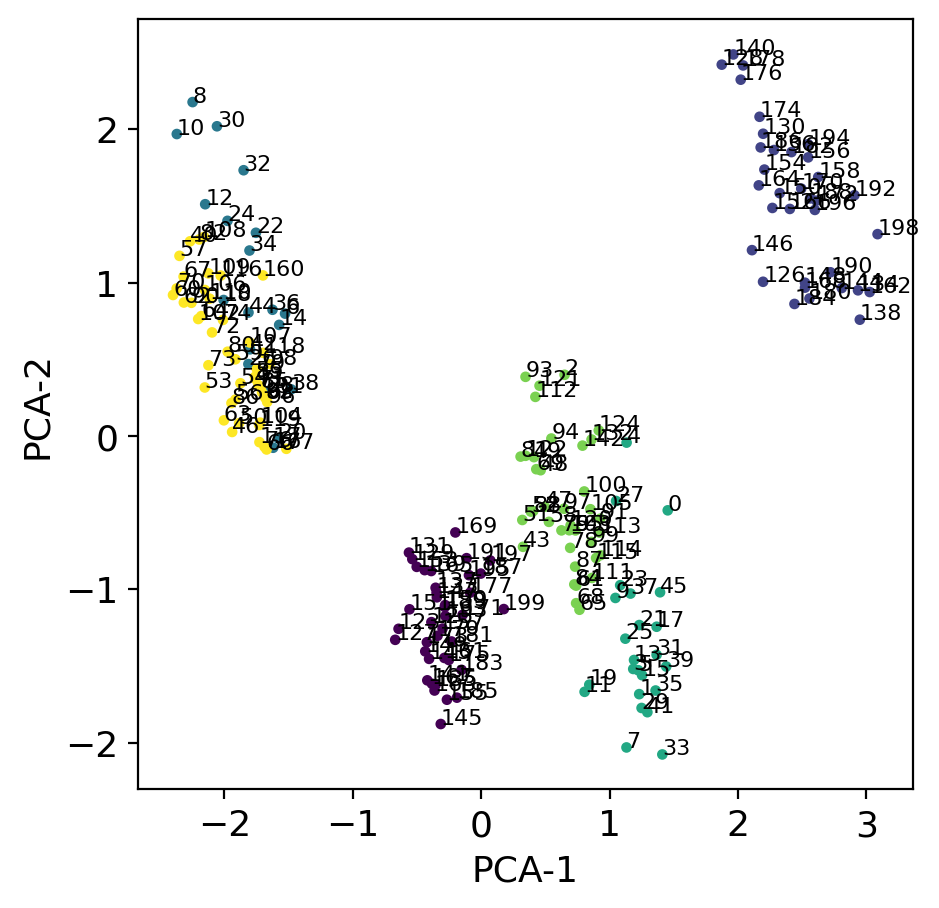

In [59]:
pca = PCA(2)
X_pca2 = pca.fit_transform(df)

plt.scatter(X_pca2[:,0],X_pca2[:,1], c=kmeans.labels_, s=8)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

# 고객 번호 쓰기
for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n],
         n,fontsize=8)